In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

fp_ds1 = "../datasets/heart_failure_clinical_records_dataset.csv"
original = pd.read_csv(fp_ds1, parse_dates=False, sep=',')
my_palette = {'yellow': '#ECD474', 'pale orange': '#E9AE4E', 'salmon': '#E2A36B', 'orange': '#F79522', 'dark orange': '#D7725E',
              'pale acqua': '#92C4AF', 'acqua': '#64B29E', 'marine': '#3D9EA9', 'green': '#10A48A', 'olive': '#99C244',
              'pale blue': '#BDDDE0', 'blue2': '#199ED5', 'blue3': '#1DAFE5', 'dark blue': '#0C70B2',
              'pale pink': '#D077AC', 'pink': '#EA4799', 'lavender': '#E09FD5', 'lilac': '#B081B9', 'purple': '#923E97',
              'white': '#FFFFFF', 'light grey': '#D2D3D4', 'grey': '#939598', 'black': '#000000'}

In [2]:
import datetime as dt

NR_COLUMNS: int = 3
HEIGHT: int = 4


def choose_grid(nr):
    if nr < NR_COLUMNS:
        return 1, nr
    else:
        return (nr // NR_COLUMNS, NR_COLUMNS) if nr % NR_COLUMNS == 0 else (nr // NR_COLUMNS + 1, NR_COLUMNS)


def set_axes(xvalues: list, ax: plt.Axes = None, title: str = '', xlabel: str = '', ylabel: str = '', percentage=False):
    if ax is None:
        ax = plt.gca()
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if percentage:
        ax.set_ylim(0.0, 1.0)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(xvalues, fontsize='small', ha='center')

    return ax


def set_locators(xvalues: list, ax: plt.Axes = None):
    if isinstance(xvalues[0], dt.datetime):
        locator = mdates.AutoDateLocator()
        ax.xaxis.set_major_locator(locator)
        ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(locator, defaultfmt='%Y-%m-%d'))
    else:
        ax.set_xticks(xvalues)
        ax.set_xlim(xvalues[0], xvalues[-1])

    return ax


def plot_line(xvalues: list, yvalues: list, ax: plt.Axes = None, title: str = '', xlabel: str = '',
              ylabel: str = '', percentage=False):
    ax = set_axes(xvalues, ax=ax, title=title, xlabel=xlabel, ylabel=ylabel, percentage=percentage)
    ax = set_locators(xvalues, ax=ax)
    ax.plot(xvalues,  yvalues, c=cfg.LINE_COLOR)


def multiple_line_chart(xvalues: list, yvalues: dict, ax: plt.Axes = None, title: str = '',
                        xlabel: str = '', ylabel: str = '', percentage=False):
    ax = set_axes(xvalues, ax=ax, title=title, xlabel=xlabel, ylabel=ylabel, percentage=percentage)
    ax = set_locators(xvalues, ax=ax)

    legend: list = []
    for name, y in yvalues.items():
        ax.plot(xvalues, y)
        legend.append(name)
    ax.legend(legend)


def bar_chart(xvalues: list, yvalues: list, ax: plt.Axes = None, title: str = '',
              xlabel: str = '', ylabel: str = '', percentage=False):
    ax = set_axes(xvalues, ax=ax, title=title, xlabel=xlabel, ylabel=ylabel, percentage=percentage)
    ax.bar(xvalues, yvalues, edgecolor=my_palette['dark blue'], color=my_palette['pale blue'])


def multiple_bar_chart(xvalues: list, yvalues: dict, ax: plt.Axes = None, title: str = '',
                       xlabel: str = '', ylabel: str = '', percentage=False):
    ax = set_axes(xvalues, ax=ax, title=title, xlabel=xlabel, ylabel=ylabel, percentage=percentage)

    x = np.arange(len(xvalues))  # the label locations

    width = 0.8 / (len(xvalues)*len(yvalues))
    # the width of the bars
    step = width / len(xvalues)
    i: int = 0
    for metric in yvalues:
        ax.bar(x + i*width, yvalues[metric], width=width, align='center', label=metric)
        i += 1
    ax.set_xticks(x + width/len(xvalues) - step/2)
    ax.legend(fontsize='x-small', title_fontsize='small')


def plot_confusion_matrix(cnf_matrix: np.ndarray, classes_names: np.ndarray,
                          ax: plt.Axes = None, normalize: bool = False):
    if ax is None:
        ax = plt.gca()
    if normalize:
        total = cnf_matrix.sum(axis=1)[:, np.newaxis]
        cm = cnf_matrix.astype('float') / total
        title = "Normalized confusion matrix"
    else:
        cm = cnf_matrix
        title = 'Confusion matrix'
    np.set_printoptions(precision=2)
    tick_marks = np.arange(0, len(classes_names), 1)
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes_names)
    ax.set_yticklabels(classes_names)
    ax.imshow(cm, interpolation='nearest', cmap=clrs.LinearSegmentedColormap.from_list("myCMPBlues", [my_palette['pale blue'], my_palette['blue2'], my_palette['blue3'], my_palette['dark blue']]))

    fmt = '.2f' if normalize else 'd'
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, format(cm[i, j], fmt), color='w', horizontalalignment="center")


def plot_evaluation_results(labels: np.ndarray, trn_y, prd_trn, tst_y, prd_tst):
    cnf_mtx_trn = metrics.confusion_matrix(trn_y, prd_trn, labels)
    tn_trn, fp_trn, fn_trn, tp_trn = cnf_mtx_trn.ravel()
    cnf_mtx_tst = metrics.confusion_matrix(tst_y, prd_tst, labels)
    tn_tst, fp_tst, fn_tst, tp_tst = cnf_mtx_tst.ravel()

    evaluation = {'Accuracy': [(tn_trn + tp_trn) / (tn_trn + tp_trn + fp_trn + fn_trn),
                               (tn_tst + tp_tst) / (tn_tst + tp_tst + fp_tst + fn_tst)],
                  'Recall': [tp_trn / (tp_trn + fn_trn), tp_tst / (tp_tst + fn_tst)],
                  'Specificity': [tn_trn / (tn_trn + fp_trn), tn_tst / (tn_tst + fp_tst)],
                  'Precision': [tp_trn / (tp_trn + fp_trn), tp_tst / (tp_tst + fp_tst)]}

    fig, axs = plt.subplots(1, 2, figsize=(2 * HEIGHT, HEIGHT))
    multiple_bar_chart(['Train', 'Test'], evaluation, ax=axs[0], title="Model's performance over Train and Test sets")
    plot_confusion_matrix(cnf_mtx_tst, labels, ax=axs[1])


def plot_roc_chart(models: dict, tstX: np.ndarray, tstY: np.ndarray, ax: plt.Axes = None, target: str = 'class'):
    if ax is None:
        ax = plt.gca()
    ax.set_xlim(0.0, 1.0)
    ax.set_ylim(0.0, 1.0)
    ax.set_xlabel('FP rate')
    ax.set_ylabel('TP rate')
    ax.set_title('ROC chart for %s' % target)

    ax.plot([0, 1], [0, 1], color='navy', label='random', linewidth=1, linestyle='--',  marker='')
    for clf in models.keys():
        metrics.plot_roc_curve(models[clf], tstX, tstY, ax=ax, marker='', linewidth=1)
    ax.legend(loc="lower right")

In [3]:
original.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [4]:
sb_vars = original.select_dtypes(include='object')
original[sb_vars.columns] = original.select_dtypes(['object']).apply(lambda x: x.astype('category'))

cols_nr = original.select_dtypes(include='number')
cols_sb = original.select_dtypes(include='category')
original.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

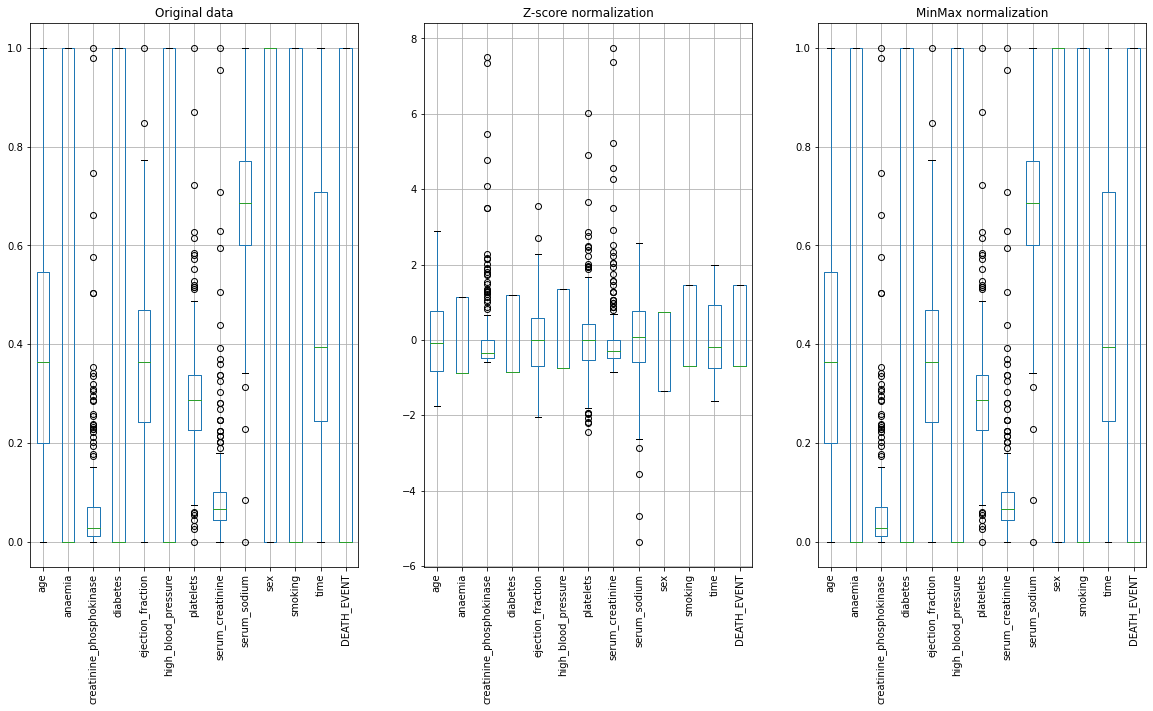

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

transf = StandardScaler(with_mean=True, with_std=True, copy=True).fit(cols_nr)
cols_nr = pd.DataFrame(transf.transform(cols_nr), columns= cols_nr.columns)
norm_data_zscore = cols_nr.join(cols_sb, how='right')
norm_data_zscore.describe(include='all')

transf = MinMaxScaler(feature_range=(0, 1), copy=True).fit(cols_nr)
cols_nr = pd.DataFrame(transf.transform(cols_nr), columns= cols_nr.columns)
norm_data_minmax = cols_nr.join(cols_sb, how='right')
norm_data_minmax.describe(include='all')

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(20,10),squeeze=False)
axs[0, 0].set_title('Original data')
cols_nr.boxplot(ax=axs[0, 0], rot = 90)
axs[0, 1].set_title('Z-score normalization')
norm_data_zscore.boxplot(ax=axs[0, 1], rot = 90 )
axs[0, 2].set_title('MinMax normalization')
norm_data_minmax.boxplot(ax=axs[0, 2], rot = 90)
#fig.tight_layout()
plt.show()

In [6]:
norm_data_minmax.describe(include='all')

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean     0.833893    0.431438                331.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min    -20.000000    0.000000               -227.000000    0.000000   
25%     -9.000000    0.000000               -133.500000    0.000000   
50%      0.000000    0.000000                  0.000000    0.000000   
75%     10.000000    1.000000                332.000000    1.000000   
max     35.000000    1.000000               7611.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean            0.083612             0.351171    1358.029264   
std            11.834841             0.478136   97804.236869   
min           -24.000000             0.000000 -236900.000000   
25%            -8.000000             0.000000  -49500.000000   
50%             0.000000             0.000000       0.000000   
75%             7.000000             1.000000   41500.000000   
max            42.000000             1.000000  588000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            0.29388     -0.374582   -0.351171    0.32107   15.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min            -0.60000    -24.000000   -1.000000    0.00000 -111.000000   
25%            -0.20000     -3.000000   -1.000000    0.00000  -42.000000   
50%             0.00000      0.000000    0.000000    0.00000    0.000000   
75%             0.30000      3.000000    0.000000    1.00000   88.000000   
max             8.30000     11.000000    0.000000    1.00000  170.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [10]:
#ALL DATA IS MINMAXED
norm_data_minmax.to_csv(r'ds1_normalized.csv')

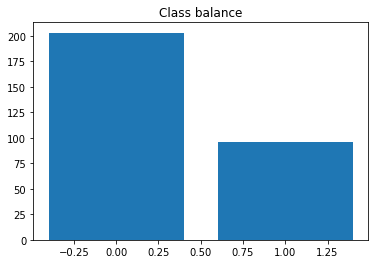

Minority class: 96
Majority class: 203
Proportion: 0.47 : 1


In [11]:
import matplotlib.pyplot as plt

target_count = norm_data_minmax['DEATH_EVENT'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar(target_count.index, target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1')

In [12]:
#DATASET WILL REQUIRE BALANCING WHEN TESTING

In [13]:
for col in norm_data_minmax:
    if(col != 'DEATH_EVENT'):
        Q1=norm_data_minmax[col].quantile(0.25)
        Q3=norm_data_minmax[col].quantile(0.75)
        iqr=Q3-Q1
        lowerlimit=Q1-1.5*iqr
        upperlimit=Q3+1.5*iqr
        norm_data_minmax=norm_data_minmax[(norm_data_minmax[col]>lowerlimit) & (norm_data_minmax[col]<upperlimit)]

In [15]:
norm_data_minmax.describe(include='all')

age    anaemia  creatinine_phosphokinase    diabetes  \
count  224.000000  224.00000                224.000000  224.000000   
mean     0.378355    0.46875                  0.040054    0.419643   
std      0.217202    0.50014                  0.035662    0.494606   
min      0.000000    0.00000                  0.000893    0.000000   
25%      0.181818    0.00000                  0.011674    0.000000   
50%      0.363636    0.00000                  0.024113    0.000000   
75%      0.545455    1.00000                  0.071319    1.000000   
max      1.000000    1.00000                  0.150421    1.000000   

       ejection_fraction  high_blood_pressure   platelets  serum_creatinine  \
count         224.000000           224.000000  224.000000        224.000000   
mean            0.366342             0.379464    0.279749          0.070626   
std             0.177436             0.486340    0.081408          0.036831   
min             0.000000             0.000000    0.117469          0.011236   
25%             0.242424             0.000000    0.224148          0.044944   
50%             0.363636             0.000000    0.287792          0.067416   
75%             0.469697             1.000000    0.329919          0.089888   
max             0.772727             1.000000    0.487211          0.179775   

       serum_sodium         sex     smoking        time  DEATH_EVENT  
count    224.000000  224.000000  224.000000  224.000000   224.000000  
mean       0.686990    0.642857    0.321429    0.457836     0.272321  
std        0.108764    0.480231    0.468071    0.272526     0.446151  
min        0.342857    0.000000    0.000000    0.000000     0.000000  
25%        0.600000    0.000000    0.000000    0.255338     0.000000  
50%        0.685714    1.000000    0.000000    0.412811     0.000000  
75%        0.771429    1.000000    1.000000    0.715302     1.000000  
max        1.000000    1.000000    1.000000    1.000000     1.000000

In [16]:
norm_data_minmax.to_csv(r'ds1_normalized_and_no_outliers.csv')
#299-224 = X outliers

In [19]:
import numpy as np

# Create correlation matrix
corr_matrix = norm_data_minmax.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
norm_data_minmax.drop(to_drop, axis=1, inplace=True)

#NO >95% CORRELATION IN THIS DATASET AFTER REMOVAL OF OUTLIERS

In [20]:
norm_data_minmax.describe(include='all')

age    anaemia  creatinine_phosphokinase    diabetes  \
count  224.000000  224.00000                224.000000  224.000000   
mean     0.378355    0.46875                  0.040054    0.419643   
std      0.217202    0.50014                  0.035662    0.494606   
min      0.000000    0.00000                  0.000893    0.000000   
25%      0.181818    0.00000                  0.011674    0.000000   
50%      0.363636    0.00000                  0.024113    0.000000   
75%      0.545455    1.00000                  0.071319    1.000000   
max      1.000000    1.00000                  0.150421    1.000000   

       ejection_fraction  high_blood_pressure   platelets  serum_creatinine  \
count         224.000000           224.000000  224.000000        224.000000   
mean            0.366342             0.379464    0.279749          0.070626   
std             0.177436             0.486340    0.081408          0.036831   
min             0.000000             0.000000    0.117469          0.011236   
25%             0.242424             0.000000    0.224148          0.044944   
50%             0.363636             0.000000    0.287792          0.067416   
75%             0.469697             1.000000    0.329919          0.089888   
max             0.772727             1.000000    0.487211          0.179775   

       serum_sodium         sex     smoking        time  DEATH_EVENT  
count    224.000000  224.000000  224.000000  224.000000   224.000000  
mean       0.686990    0.642857    0.321429    0.457836     0.272321  
std        0.108764    0.480231    0.468071    0.272526     0.446151  
min        0.342857    0.000000    0.000000    0.000000     0.000000  
25%        0.600000    0.000000    0.000000    0.255338     0.000000  
50%        0.685714    1.000000    0.000000    0.412811     0.000000  
75%        0.771429    1.000000    1.000000    0.715302     1.000000  
max        1.000000    1.000000    1.000000    1.000000     1.000000

In [ ]:
#DATASET DOENS'T NEED DUMMIFICATION FOR DEATH_EVENT